In [29]:
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, Point
import random
import pandas as pd
from matplotlib.patches import Ellipse
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [30]:
image_name = "M120053540ME"

# List of vertices for a single polygon
# long lat
# upper left, upper right, lower right, lower left (website)
# polygon_vertices = ([(65.55, 23.45), (68.87, 23.42), (69.17, 33.37), (65.41, 33.41)], "M119415370ME")  # Single polygon
corners = [
    (327.83,33.91),  # Upper Left
    (330.86,33.92),  # Upper Right
    (330.9,43.89),  # Lower Right
    (327.5,43.87),  # Lower Left
]

polygon_vertices = (corners, image_name)
resolution = 	52.38635816660968
min_major = 10
max_major = 100

In [31]:
df = pd.read_csv('./lunar_crater_database_robbins_2018.csv')
columns = ['LAT_ELLI_IMG', 'LON_ELLI_IMG', 'DIAM_ELLI_MAJOR_IMG', 'DIAM_ELLI_MINOR_IMG', 'DIAM_ELLI_ANGLE_IMG']
# columns = ['LAT_CIRC_IMG', 'LON_CIRC_IMG', 'DIAM_CIRC_IMG']

df = df.loc[:, columns]
df.describe()

,LAT_ELLI_IMG,LON_ELLI_IMG,DIAM_ELLI_MAJOR_IMG,DIAM_ELLI_MINOR_IMG,DIAM_ELLI_ANGLE_IMG
count,1.296758e+06,1.296758e+06,1.296758e+06,1.296758e+06,1.296758e+06
mean,-1.316777e+00,1.664043e+02,2.604695e+00,2.280037e+00,8.662636e+01
std,4.356387e+01,9.680489e+01,5.787466e+00,5.234790e+00,3.956002e+01
min,-8.984790e+01,5.286540e-04,9.517580e-01,5.054060e-01,2.516500e-04
25%,-3.703428e+01,8.813560e+01,1.326442e+00,1.160680e+00,6.162833e+01
50%,-3.664035e+00,1.594170e+02,1.719435e+00,1.502360e+00,8.495685e+01
75%,3.326495e+01,2.386250e+02,2.553070e+00,2.228590e+00,1.102230e+02
max,8.997350e+01,3.600000e+02,2.612570e+03,2.373250e+03,1.800000e+02


In [32]:
df = df[(df['DIAM_ELLI_MAJOR_IMG'] > min_major) & (df['DIAM_ELLI_MAJOR_IMG'] < max_major)]
df

,LAT_ELLI_IMG,LON_ELLI_IMG,DIAM_ELLI_MAJOR_IMG,DIAM_ELLI_MINOR_IMG,DIAM_ELLI_ANGLE_IMG
34,61.0368,187.8640,20.3166,12.2268,3.04981
35,60.9761,185.5990,13.1538,11.9469,5.04780
36,60.8100,183.0470,27.3152,26.9785,81.51690
37,60.2650,181.9700,36.4163,34.0002,68.41500
39,61.2506,178.4850,22.4197,18.7264,62.49270
...,...,...,...,...,...
1296786,-83.7582,68.5942,72.1062,61.5883,98.47400
1296787,-76.6495,192.9930,18.9654,16.7405,165.23800
1296788,-76.8525,190.7570,20.2091,19.2353,5.26537
1296789,-71.0777,46.5907,18.2006,15.7986,29.02400


In [33]:
polygon = Polygon(polygon_vertices[0])

# Function to check if a point is inside the polygon
def is_point_in_polygon(point, polygon):
    return Point(point).within(polygon)

mask = df.apply(lambda row: is_point_in_polygon((row['LON_ELLI_IMG'], row['LAT_ELLI_IMG']), polygon), axis=1)
points_inside = df[mask]
points_inside

,LAT_ELLI_IMG,LON_ELLI_IMG,DIAM_ELLI_MAJOR_IMG,DIAM_ELLI_MINOR_IMG,DIAM_ELLI_ANGLE_IMG
396449,34.4729,328.731,13.4207,13.2138,124.726


In [34]:
def cal_semi(diameter):
    return diameter * 1000 / resolution / 2

points_inside['semi_major'] = points_inside['DIAM_ELLI_MAJOR_IMG'].apply(cal_semi)
points_inside['semi_minor'] = points_inside['DIAM_ELLI_MINOR_IMG'].apply(cal_semi)
points_inside


,LAT_ELLI_IMG,LON_ELLI_IMG,DIAM_ELLI_MAJOR_IMG,DIAM_ELLI_MINOR_IMG,DIAM_ELLI_ANGLE_IMG,semi_major,semi_minor
396449,34.4729,328.731,13.4207,13.2138,124.726,128.093462,126.118712


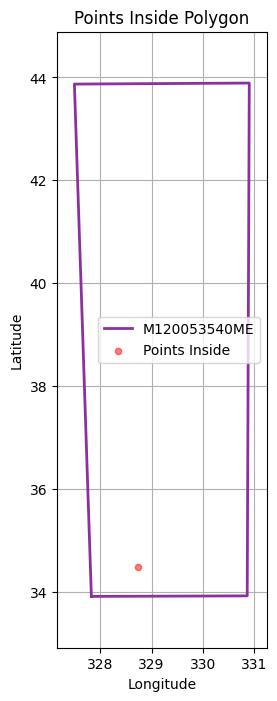

Total points: 1
Points inside polygon: 27552


In [35]:
# Create the plot
fig, ax = plt.subplots(figsize=(14, 8))

# Plot the polygon
polygon_x, polygon_y = polygon.exterior.xy
random_color = [random.random() for _ in range(3)]
ax.plot(polygon_x, polygon_y, color=random_color, label=polygon_vertices[1], linewidth=2)

# Plot the points inside the polygon
ax.scatter(points_inside['LON_ELLI_IMG'], points_inside['LAT_ELLI_IMG'], 
          color='red', s=20, alpha=0.5, label='Points Inside')

# Customize the plot
ax.grid(True)
ax.set_aspect('equal', adjustable='box')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Points Inside Polygon')
ax.legend()

# Add some padding to the axis limits
x_padding = (max(polygon_x) - min(polygon_x)) * 0.1
y_padding = (max(polygon_y) - min(polygon_y)) * 0.1
ax.set_xlim(min(polygon_x) - x_padding, max(polygon_x) + x_padding)
ax.set_ylim(min(polygon_y) - y_padding, max(polygon_y) + y_padding)

plt.show()

# Print some statistics
print(f"Total points: {len(points_inside)}")
print(f"Points inside polygon: {len(df)}")


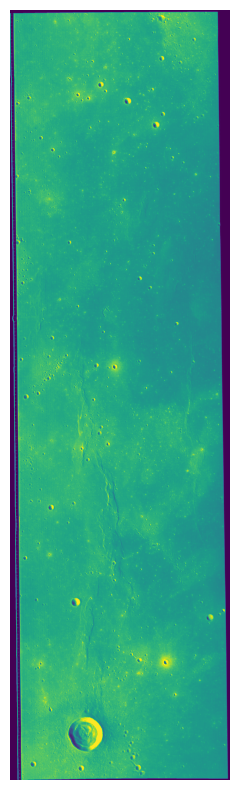

In [36]:
# Read and plot a PNG image
image_path = f'output/{image_name}/{image_name}.png'
image = plt.imread(image_path)

# Create a new figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Display the image
ax.imshow(image)
ax.axis('off')  # Hide the axis

plt.show()

In [37]:
training_points = pd.read_csv(f'output/{image_name}/points.txt')

training_points.rename(columns={'Planetocentric Latitude': 'lat'}, inplace=True)
training_points.rename(columns={'360 Positive East Longitude': 'lon'}, inplace=True)
training_points.rename(columns={'Sample': 'x'}, inplace=True)
training_points.rename(columns={'Line': 'y'}, inplace=True)

src_points = np.array(training_points[['lon', 'lat']], dtype=np.float32)
dst_points = np.array(training_points[['x', 'y']], dtype=np.float32)

In [38]:
test_df = points_inside[['LAT_ELLI_IMG', 'LON_ELLI_IMG']]
test_df.rename(columns={'LAT_ELLI_IMG': 'y_test', 'LON_ELLI_IMG': 'x_test'}, inplace=True)
test_df = test_df[['x_test', 'y_test']]

test_points = np.array(test_df,  dtype=np.float32) #inferencing points
test_points_homogeneous = np.hstack([test_points, np.ones((len(test_points), 1))])

In [39]:
import cv2

H, status = cv2.findHomography(src_points, dst_points)
H

array([[ 5.81363840e+02,  1.66814272e+00, -1.90422445e+05],
       [ 1.91080900e+00, -7.40675425e+02,  3.19247253e+04],
       [ 6.47867510e-04,  1.96414725e-03,  1.00000000e+00]])

In [40]:
transformed_homogeneous = test_points_homogeneous @ H.T
transformed_points = transformed_homogeneous[:, :2] / transformed_homogeneous[:, 2:]

In [41]:
center_transformed = pd.DataFrame(transformed_points, columns=['x', 'y'])
center_transformed

,x,y
0,583.571069,5481.162749


In [42]:
points_inside.reset_index(drop=True, inplace=True)
points_inside.loc[:, 'x'] = center_transformed.iloc[:, 0]
points_inside.loc[:, 'y'] = center_transformed.iloc[:, 1]

# Display the updated points_inside DataFrame
points_inside

,LAT_ELLI_IMG,LON_ELLI_IMG,DIAM_ELLI_MAJOR_IMG,DIAM_ELLI_MINOR_IMG,DIAM_ELLI_ANGLE_IMG,semi_major,semi_minor,x,y
0,34.4729,328.731,13.4207,13.2138,124.726,128.093462,126.118712,583.571069,5481.162749


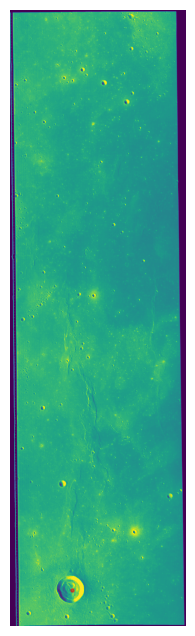

In [43]:
fig, ax = plt.subplots(figsize=(14, 8))

ax.imshow(image)
ax.axis('off')  

ax.scatter(transformed_points[:, 0], transformed_points[:, 1], color='red', s=5, alpha=0.5)

plt.show()


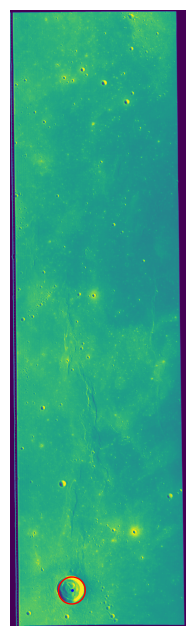

In [44]:
# Create a new figure and axis
fig, ax = plt.subplots(figsize=(14, 8))

# Display the image
ax.imshow(image)
ax.axis('off')  # Hide the axis

# Loop through points_inside and draw ellipses
for _, row in points_inside.iterrows():
    ellipse = Ellipse(
        (row['x'], row['y']),
        width=row['semi_major'] * 2,
        height=row['semi_minor'] * 2,
        angle=row['DIAM_ELLI_ANGLE_IMG'],
        edgecolor='red',
        facecolor='none'
    )
    ax.add_patch(ellipse)

    # Draw the center of the ellipse
    ax.plot(row['x'], row['y'], 'bo', markersize=1)  # 'bo' stands for blue color and circle marker


plt.show()